In [1]:
exec(open("../header.py", "r").read())

In [11]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

In [3]:
data = load_boston()

In [8]:
X = scale(data['data'])
y = data['target']

In [7]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)

*** OUTPUT (output/01_best_p.dat) ***
1.00


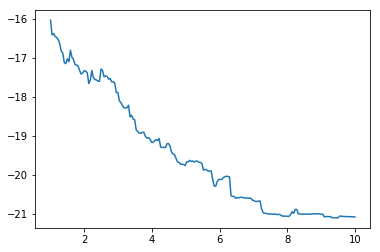

In [18]:
@answer
def best_p(fout):
    points = sp.linspace(1,10,200)
    res = []
    for point in points:
        score = cross_val_score(KNeighborsRegressor(n_neighbors=5, weights="distance", p=point)
                               ,X, y
                               ,scoring="neg_mean_squared_error"
                               ,cv=folds).mean()
        res.append((point, score))
    res = sp.array(res)
    plt.plot(res[:, 0], res[:, 1])
    fout.write(f"{res[sp.argmax(res[:, 1]), 0]:.2f}")
best_p()